# Homework 2

You need to edit this `.ipynb` file by replacing "# Your code", "# Your answer", etc., click "Restart & Run All" in Jupyter Notebook to generate your results, and download it as an `.html` file. Please submit your `.ipynb` and `.html` files (instead of a `.zip` file) on Moodle. If you have questions regarding the homework, please email the TA Saumil Shah (sashah8@ncsu.edu), or attend our office hours.

In this homework, you will solve a classic problem using $k$-NN. The problem is to classify grayscale images of handwritten digits (28 pixels by 28 pixels) into their 10 categories (0 to 9), based on the [MNIST database](http://yann.lecun.com/exdb/mnist/), which consists of 60,000 training images and 10,000 test images. Let's first import the data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from torchvision import datasets
train_data = datasets.MNIST(root='data', train=True, transform=np.array, download=True)
test_data = datasets.MNIST(root='data', train=False, transform=np.array, download=True)
train_X = np.array([train_data[i][0] for i in range(len(train_data))])
train_y = np.array([train_data[i][1] for i in range(len(train_data))])
test_X = np.array([test_data[i][0] for i in range(len(test_data))])
test_y = np.array([test_data[i][1] for i in range(len(test_data))])

We can plot the first 10 images with their labels:

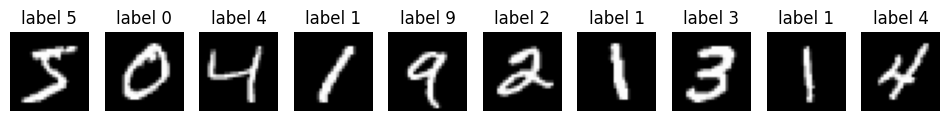

In [2]:
fig, ax = plt.subplots(1, 10, figsize=(12, 2))
for i in range(10):
    ax[i].imshow(train_X[i], cmap='gray')
    ax[i].set_title('label ' + str(train_y[i]))
    ax[i].axis('off')

Please keep the following for timekeeping:

In [3]:
start_time = datetime.now()

Now use `KNeighborsClassifier` from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) with `n_neighbors=3` to generate your predictions on the 10,000 test images, and calculate your accuracy (if you correctly classify 9,510 images, your accuracy is 0.951). You only need to report your accuracy, not your 10,000 predictions:

In [5]:
# Your code

train_X = np.array([train_data[i][0].reshape(-1) for i in range(len(train_data))]) 
test_X = np.array([test_data[i][0].reshape(-1) for i in range(len(test_data))])  

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X, train_y)
knn_predict = knn.predict(test_X)

correct_predict = np.sum(knn_predict == test_y)
accuracy = correct_predict / len(test_y)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9705


Please keep the following for timekeeping:

In [6]:
datetime.now() - start_time

datetime.timedelta(seconds=87, microseconds=885485)

Moreover, plot the first 30 images (in 3 rows and 10 columns) you didn't classify correctly, and display the correct label and your incorrect prediction in the title of each image (`label y \npred z` where `y` is the correct label, `z` is your incorrect prediction, and '\n' is a line break).

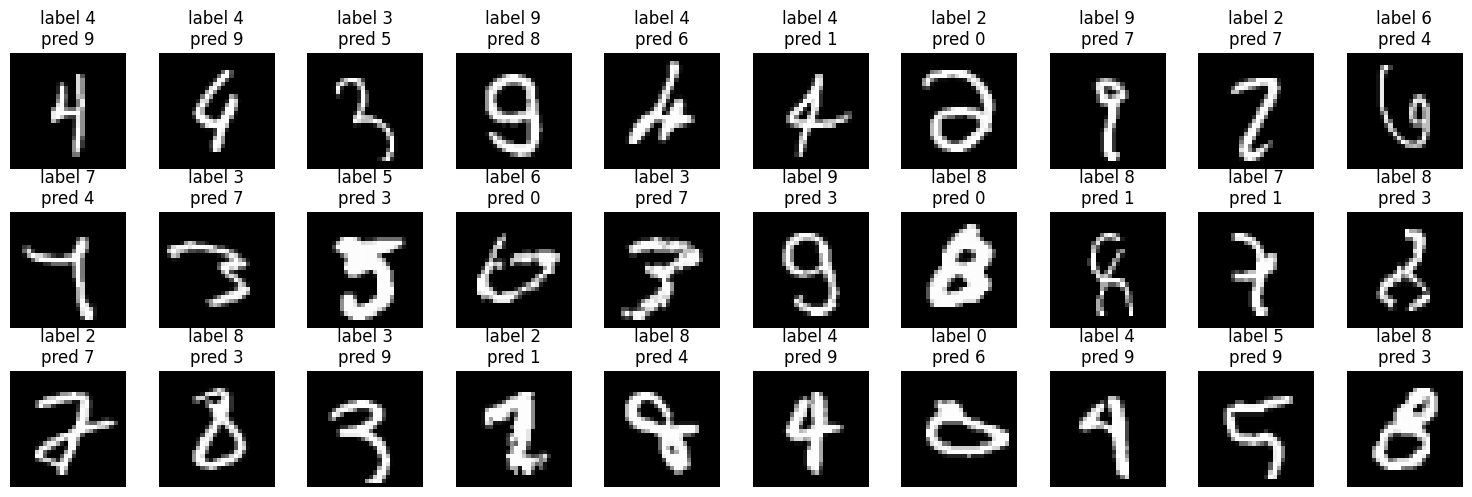

In [8]:
# Your code

incorrect_label = np.where(knn_predict != test_y)[0]
plot_number = min(30, len(incorrect_label))

fig, axes = plt.subplots(3, 10, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    if i < plot_number:
        idx = incorrect_label[i]
        image = test_X[idx].reshape(28, 28)
        true_label = test_y[idx]
        predicted_label = knn_predict[idx]

        ax.imshow(image, cmap='gray')
        ax.set_title(f'label {true_label}\npred {predicted_label}')
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()